In [4]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

In [2]:
summed_data = pd.read_parquet("../data/02_intermediate/summed_data.parquet")

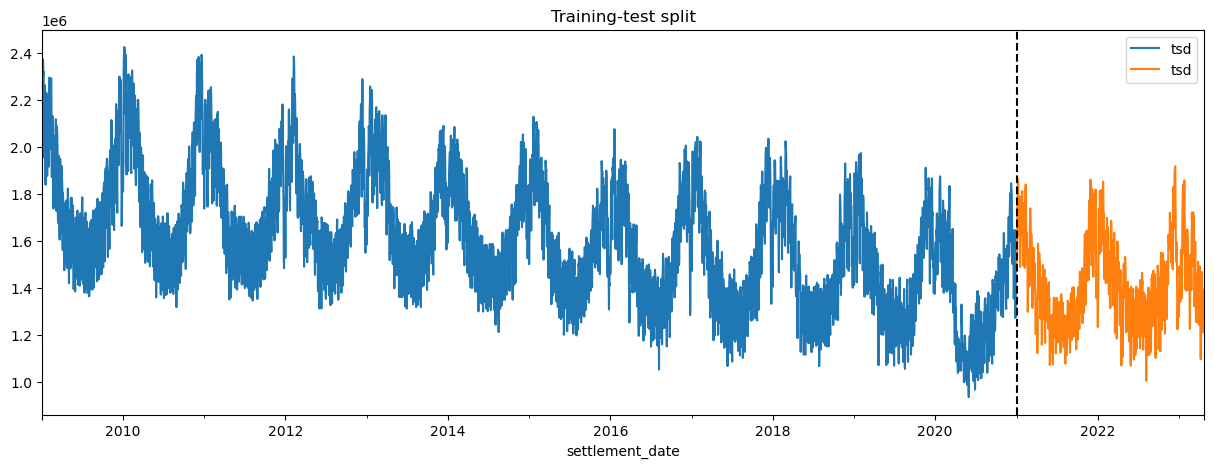

In [7]:
threshold_date = "01-01-2021"
train_data = summed_data.loc[summed_data.index < threshold_date, "tsd"].to_frame()
test_data = summed_data.loc[summed_data.index >= threshold_date, "tsd"].to_frame()

fig, ax = plt.subplots(figsize=(15, 5))
train_data.plot(ax=ax, label="Training set")
test_data.plot(ax=ax, label="Test set")
ax.axvline(threshold_date, color="k", ls="--")
ax.set_title("Training-test split")
plt.legend();

In [9]:
train_data.to_parquet('../data/03_train-test/summed_data_train.parquet')
test_data.to_parquet('../data/03_train-test/summed_data_test.parquet')